In [11]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

cm = 1/2.54

In [7]:
# setup connection
conn = psycopg2.connect(
    host='localhost',
    database='cadets_e3',
    user='rosendahl',
)
conn.set_session(readonly=False)
# get cursor
cur = conn.cursor()

insert_cursor = conn.cursor()

In [3]:
# debug
os.system("hostnamectl hostname")
print(f'current working directory: {os.getcwd()}')

vmrosendahl
current working directory: /home/rosendahl/remote_interpreter/dataset/jupyter


In [10]:
def group_bottom_percent(labels, sizes, threshold):
    total = sum(sizes)
    labels_filtered = []
    sizes_filtered = []
    count = 0
    other_count = 0
    for label, size in zip(labels, sizes):
        if size / total < threshold:
            count += 1
            other_count += size
        else:
            labels_filtered.append(label)
            sizes_filtered.append(size)
    labels_filtered.append(f'other ({count})')
    sizes_filtered.append(other_count)
    return labels_filtered, sizes_filtered

In [8]:
# get all event types with count
query = '''
select type, count(*)
from event
group by type
order by count desc;
'''

cur.execute(query)
res = cur.fetchall()

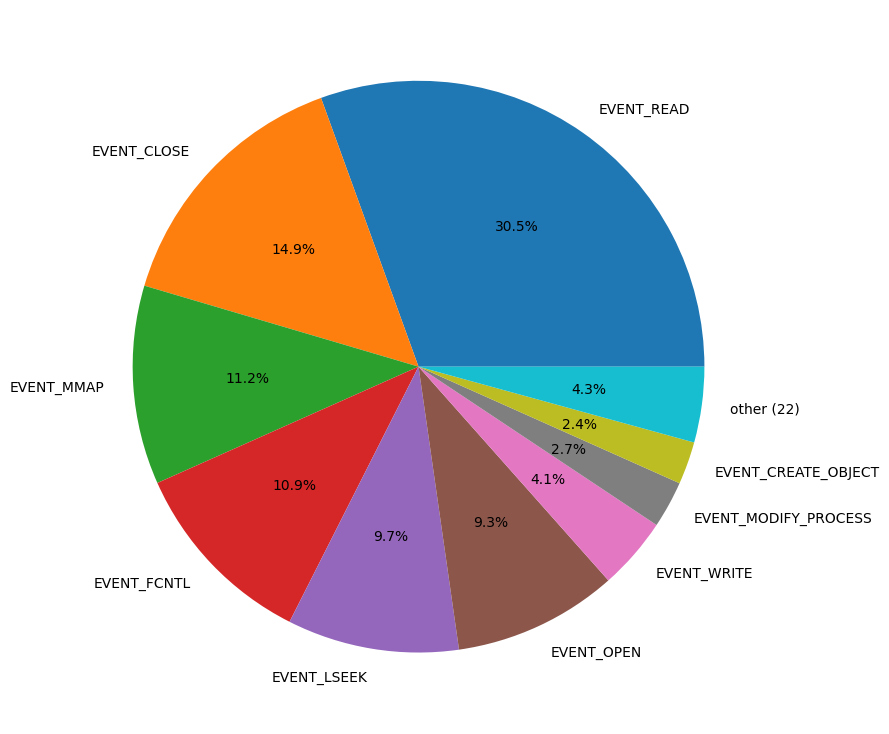

In [15]:
# plot results in pie chart

labels = [r[0] for r in res]
values = [r[1] for r in res]

labels, values = group_bottom_percent(labels, values, 0.01)

fig, ax = plt.subplots(figsize=(20*cm, 20*cm))
fig.tight_layout()
ax.set_aspect('equal')
ax.pie(values, labels=labels, autopct='%1.1f%%')

# save as svg
plt.savefig('event_types.svg')

plt.show()

In [6]:
# destroy cursor and connection
cur.close()
conn.close()